# Basic Usage

In [1]:
from golem import *

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set(context='talk', style='ticks')

First we create an example 1D objective function

In [2]:
def objective(x):
    
    def sigmoid(x, l, k, x0):
        return l / (1 + np.exp(-k*(x-x0)))

    sigs = [sigmoid(x,  1, 100, 0.1),
            sigmoid(x, -1, 100, 0.2),
            sigmoid(x,  0.7, 80, 0.5),
            sigmoid(x, -0.7, 80, 0.9)
           ]
    return np.sum(sigs, axis=0)

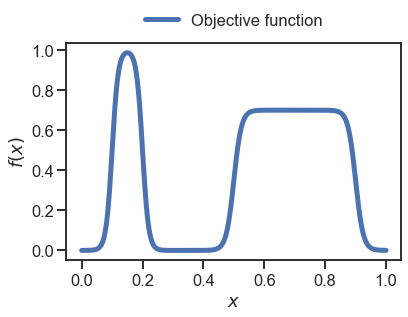

In [3]:
x = np.linspace(0, 1, 1000)
_ = plt.plot(x, objective(x), linewidth=5, label='Objective function')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)

We can now compute the robust objective assuming, e.g., a Gaussian incertainty with $\sigma=0.1$, for the input $x$.

In [4]:
# we consider 1000 samples in x
x = np.linspace(0, 1, 1000)
y = objective(x)

# initialise Golem
golem = Golem(goal='max', random_state=42, nproc=1)

# fit the Golem surrogate model - note the argument X takes a 2D array, like the sklearn models
golem.fit(X=x.reshape(-1,1), y=y)

# estimate the robust merits for the same 1000 samples
dists = [Normal(0.1)]
y_robust = golem.predict(X=x.reshape(-1,1), distributions=dists)

[INFO] Golem ... 1 tree(s) parsed in 89.88 ms ...
[INFO] Golem ... Convolution of 1000 samples performed in 20.27 ms ...


Now we plot the original 1000 samples as well as their robust counterpart

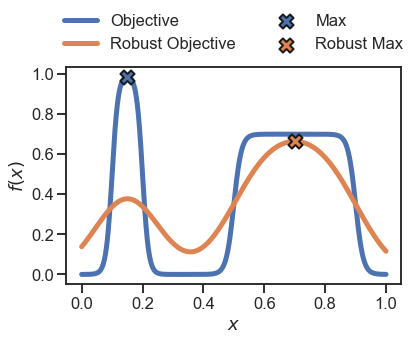

In [5]:
plt.plot(x, y, linewidth=5, label='Objective')
plt.plot(x, y_robust, linewidth=5, label='Robust Objective')

# identidy the max locations
plt.scatter(x[np.argmax(y)], np.max(y), zorder=10, s=200, marker='X', edgecolor='k', label='Max', linewidth=2)
plt.scatter(x[np.argmax(y_robust)], np.max(y_robust), zorder=10, s=200, marker='X',  edgecolor='k', label='Robust Max', linewidth=2)

_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')

To obtain the robust objective assuming a different probability density for $x$, we can choose one of the other distributions available in Golem for continuous variables.

[INFO] Golem ... Convolution of 1000 samples performed in 9.16 ms ...


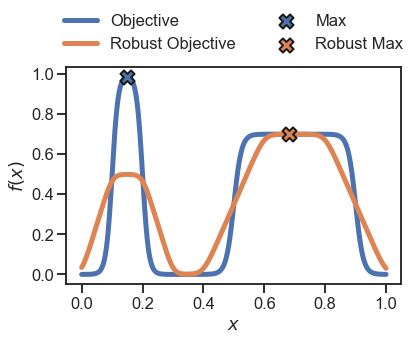

In [6]:
dists = [Uniform(0.2)]
y_robust = golem.predict(X=x.reshape(-1,1), distributions=dists)

# ----
# plot
# ----
plt.plot(x, y, linewidth=5, label='Objective')
plt.plot(x, y_robust, linewidth=5, label='Robust Objective')

plt.scatter(x[np.argmax(y)], np.max(y), zorder=10, s=200, marker='X', edgecolor='k', label='Max', linewidth=2)
plt.scatter(x[np.argmax(y_robust)], np.max(y_robust), zorder=10, s=200, marker='X',  edgecolor='k', label='Robust Max', linewidth=2)

_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')

In practice, we usually have only a few samples of the objective. For instance, let's assume we have sampled 10 random points:

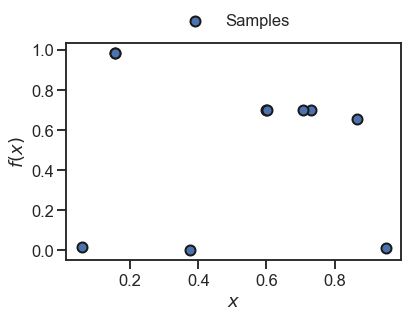

In [7]:
np.random.seed(42)
x = np.random.uniform(size=10)
y = objective(x)

_ = plt.scatter(x, y, s=100, edgecolor='k', linewidth=2, label='Samples')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)

We can now fit the Golem model as before and predict the robust merits for these samples.

In [8]:
# initialise Golem
golem = Golem(goal='max', random_state=42, nproc=1)

# fit the Golem surrogate model - note the argument X takes a 2D array, like the sklearn models
golem.fit(X=x.reshape(-1,1), y=y)

# estimate the robust merits for the same 1000 samples
dists = [Normal(0.1)]
y_robust = golem.predict(X=x.reshape(-1,1), distributions=dists)

[INFO] Golem ... 1 tree(s) parsed in 1.43 ms ...
[INFO] Golem ... Convolution of 10 samples performed in 0.04 ms ...


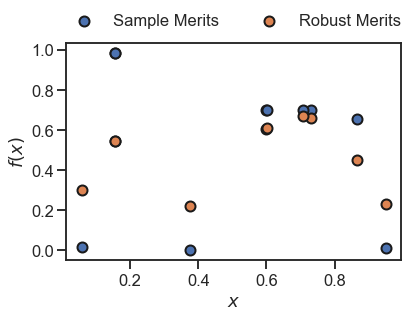

In [9]:
_ = plt.scatter(x, y, s=100, edgecolor='k', linewidth=2, label='Sample Merits')
_ = plt.scatter(x, y_robust, s=100, edgecolor='k', linewidth=2, label='Robust Merits')

_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')

In the plot above, the orange dots represent the robust estimates of the original samples in blue. These are based on the underlying surrogate model in Golem, which in this case is a single regression tree as per default.

Here below, we also plot this surrogate model, as well as the Golem estimate of the robust objective function based on the 10 samples used for training.

[INFO] Golem ... Convolution of 1000 samples performed in 0.42 ms ...


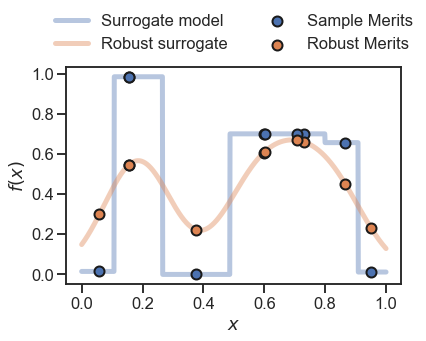

In [10]:
# y values for the tree/forest surrogate model
y_surrogate = golem.forest.predict(X=np.linspace(0,1,1000).reshape(-1,1))

# y values for the Golem estimate of the robust objective function
y_golem_objective = golem.predict(X=np.linspace(0,1,1000).reshape(-1,1), distributions=dists)

_ = plt.plot(np.linspace(0,1,1000), y_surrogate, linewidth=5, label='Surrogate model', zorder=0, alpha=0.4)
_ = plt.scatter(x, y, s=100, edgecolor='k', linewidth=2, label='Sample Merits')

_ = plt.plot(np.linspace(0,1,1000), y_golem_objective, linewidth=5, label='Robust surrogate', zorder=0, alpha=0.4)
_ = plt.scatter(x, y_robust, s=100, edgecolor='k', linewidth=2, label='Robust Merits')

_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')